# Exploring the address data
Exploration of the address dataset from [BOSA](https://opendata.bosa.be/). In this notebook we present the most common streetnames, the longes streetnames and the streets with the highest amount of houses.

In [2]:
! pip install seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 5.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 5.4 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 5.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.2 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 6.7 MB/s eta 0:00:01
   ------------------------------

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Reading the csv file into memory, this assumes you have the file of all addresses in Belgium saved in the following folder

In [4]:
belgium = pd.read_csv('../data/best_adresses_converted.csv')

C:\Users\GuillaumeLeBerre\AppData\Local\Temp\ipykernel_22632\3689611644.py:1: DtypeWarning: Columns (5,8,9,12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  belgium = pd.read_csv('../data/best_adresses_converted.csv')


## Most common streetname
We can count the amount of times a streetname occurs accross all municipalities. Between the French and Dutch names there are many similarities in names just being translations of eachother.

### Dutch names

In [5]:
# Selecting only Dutch streetnames
streets = belgium[['streetname_nl', 'postcode']].drop_duplicates()
# Grouping on name and counting
result = streets.groupby('streetname_nl').count().rename(columns={'postcode': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,count
streetname_nl,
Kerkstraat,242
Molenstraat,239
Nieuwstraat,207
Schoolstraat,192
Veldstraat,181
Stationsstraat,174
Groenstraat,160
Kloosterstraat,146
Bosstraat,145


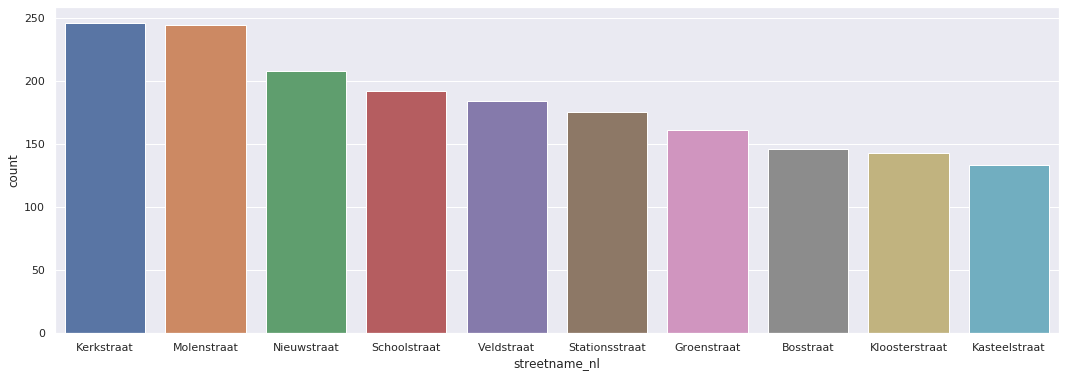

In [4]:
# Plot the result
plt.figure(figsize=(18, 6))
sns.barplot(x='streetname_nl', y='count', data=result.reset_index())

### French names

In [6]:
# Selecting only French streetnames
streets = belgium[['streetname_fr', 'postcode']].drop_duplicates()
# Grouping on name and counting
result = streets.groupby('streetname_fr').count().rename(columns={'postcode': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,count
streetname_fr,
Rue de l'Eglise,191
Rue du Moulin,165
Rue des Ecoles,132
Rue de la Station,132
Rue de la Chapelle,116
Rue de la Fontaine,111
Rue du Centre,105
Rue de la Gare,104
Rue Haute,101


<Axes: xlabel='streetname_fr', ylabel='count'>

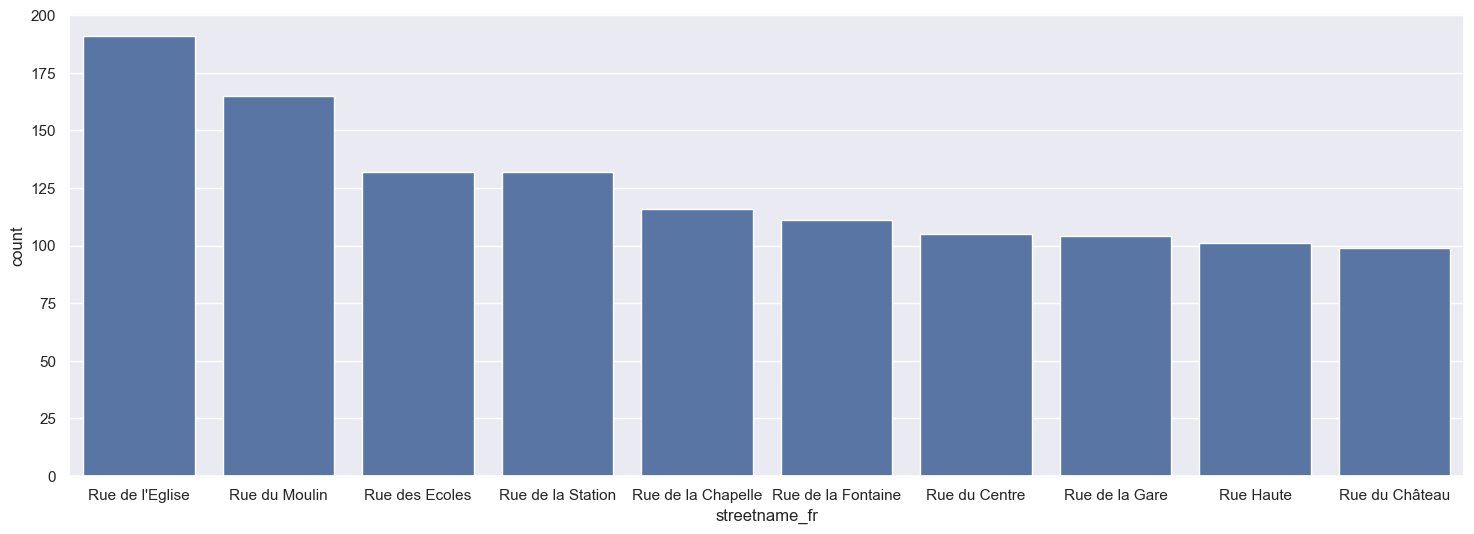

In [7]:
# Plot the result
plt.figure(figsize=(18, 6))
sns.barplot(x='streetname_fr', y='count', data=result.reset_index())

## Longest streetname
As we lack the geo data to compute the actual length of a street we resort to calculating the length of the names of the streets. With the French names there are some odd results where there seem to be comments added to the streetname.

### Dutch names

<Axes: xlabel='length', ylabel='streetname_nl'>

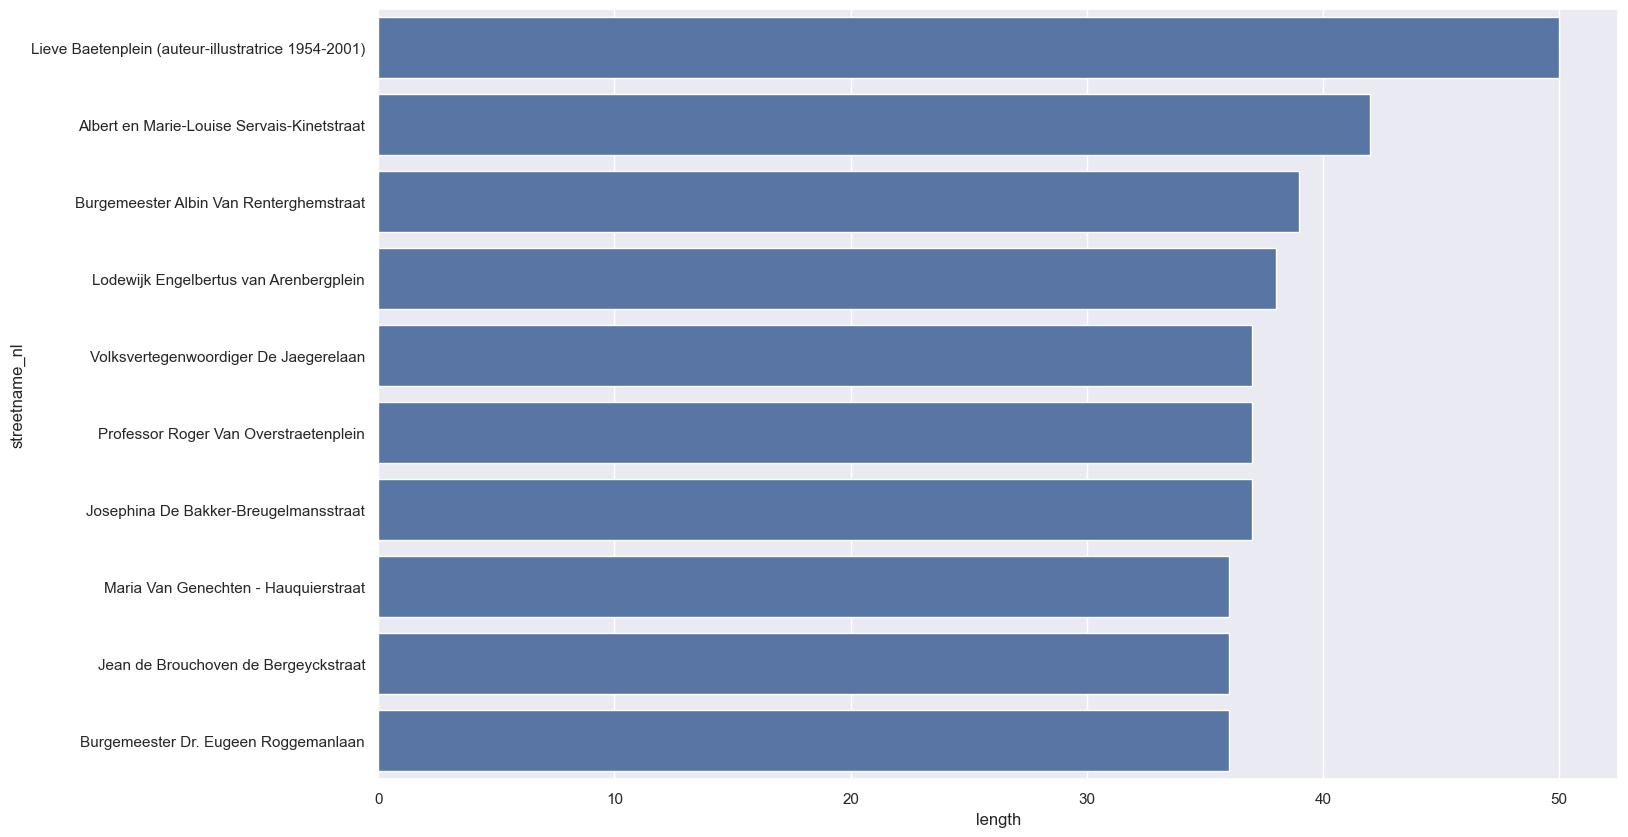

In [8]:
# Select the Dutch names and map to length
long = list(map(lambda street: (len(street), street), belgium['streetname_nl'].dropna().unique()))
# Sort to get the highest length
long.sort(reverse=True)
result = pd.DataFrame(long[:10], columns=['length', 'streetname_nl'])

# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_nl', x='length', data=result.reset_index(), orient='h')

### French names

<Axes: xlabel='length', ylabel='streetname_fr'>

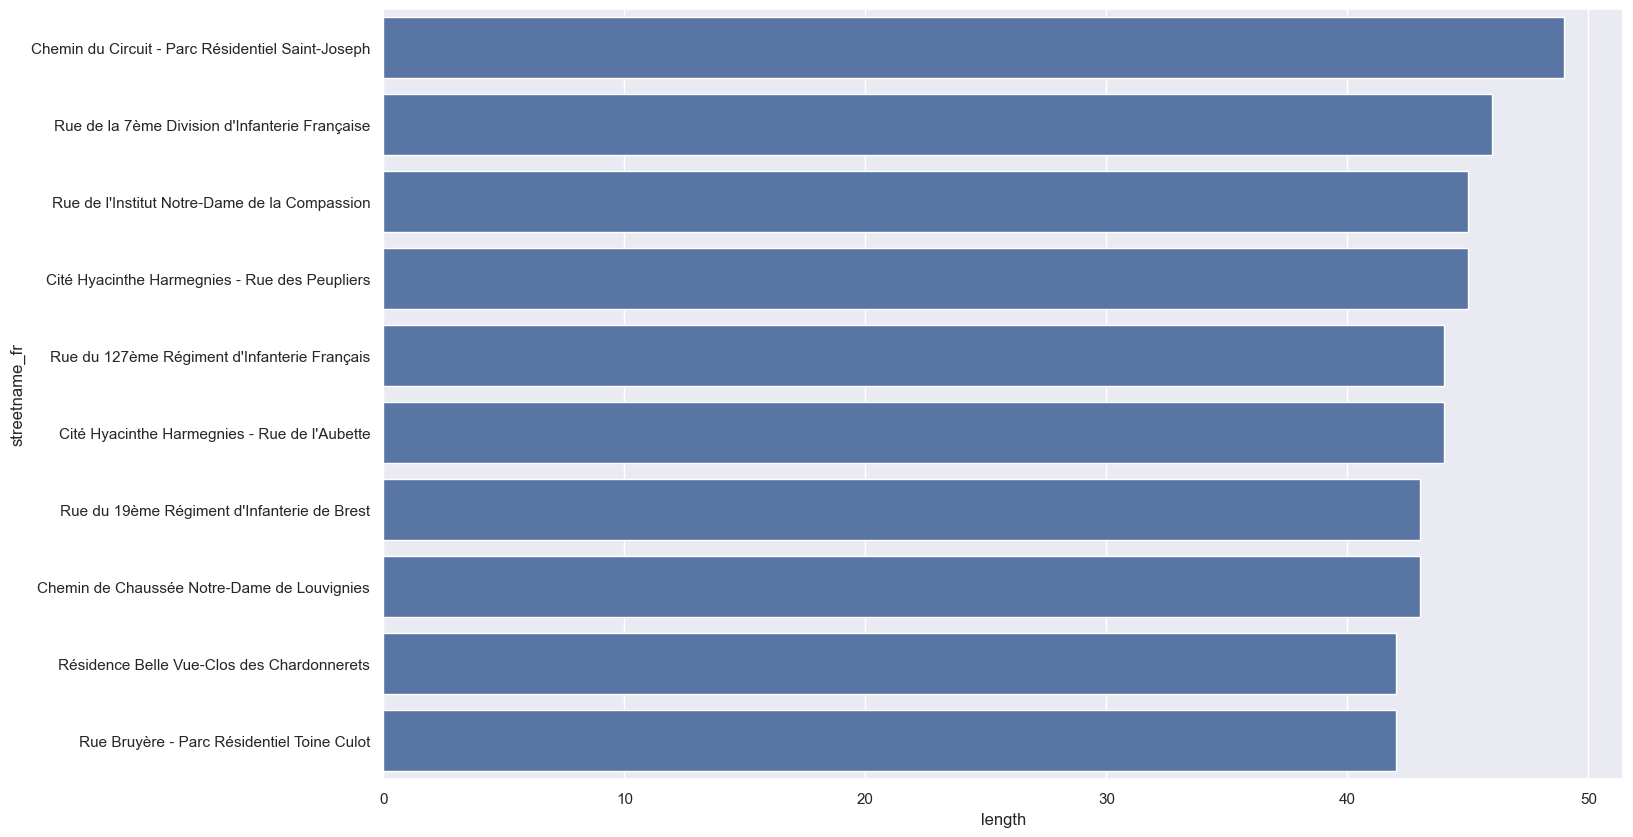

In [9]:
# Select the French names and map to length
long = list(map(lambda street: (len(street), street), belgium['streetname_fr'].dropna().unique()))
# Sort to get the highest length
long.sort(reverse=True)
result = pd.DataFrame(long[:10], columns=['length', 'streetname_fr'])

# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_fr', x='length', data=result.reset_index(), orient='h')

## Most houses on street
For both the streets in Dutch and in French we can count the amount of houses on each street and see on which streets the highest amount of houses have been built.

### Dutch streets

In [10]:
# Select the housenumbers of each street
streets = belgium[['streetname_nl', 'postcode', 'house_number']].drop_duplicates()
# Group and count
result = streets.groupby(['streetname_nl', 'postcode']).count().rename(columns={'house_number': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,,count
streetname_nl,postcode,
Bredabaan,2930,1065
Kortrijksesteenweg,9000,1038
Hundelgemsesteenweg,9820,1036
Koningin Fabiolapark,9100,1000
Kikvorsstraat,9000,957
Zwijnaardsesteenweg,9000,942
Bergense Steenweg,1070,930
Poseidonlaan,8420,921
Antwerpsesteenweg,9040,895


<Axes: xlabel='count', ylabel='streetname_nl'>

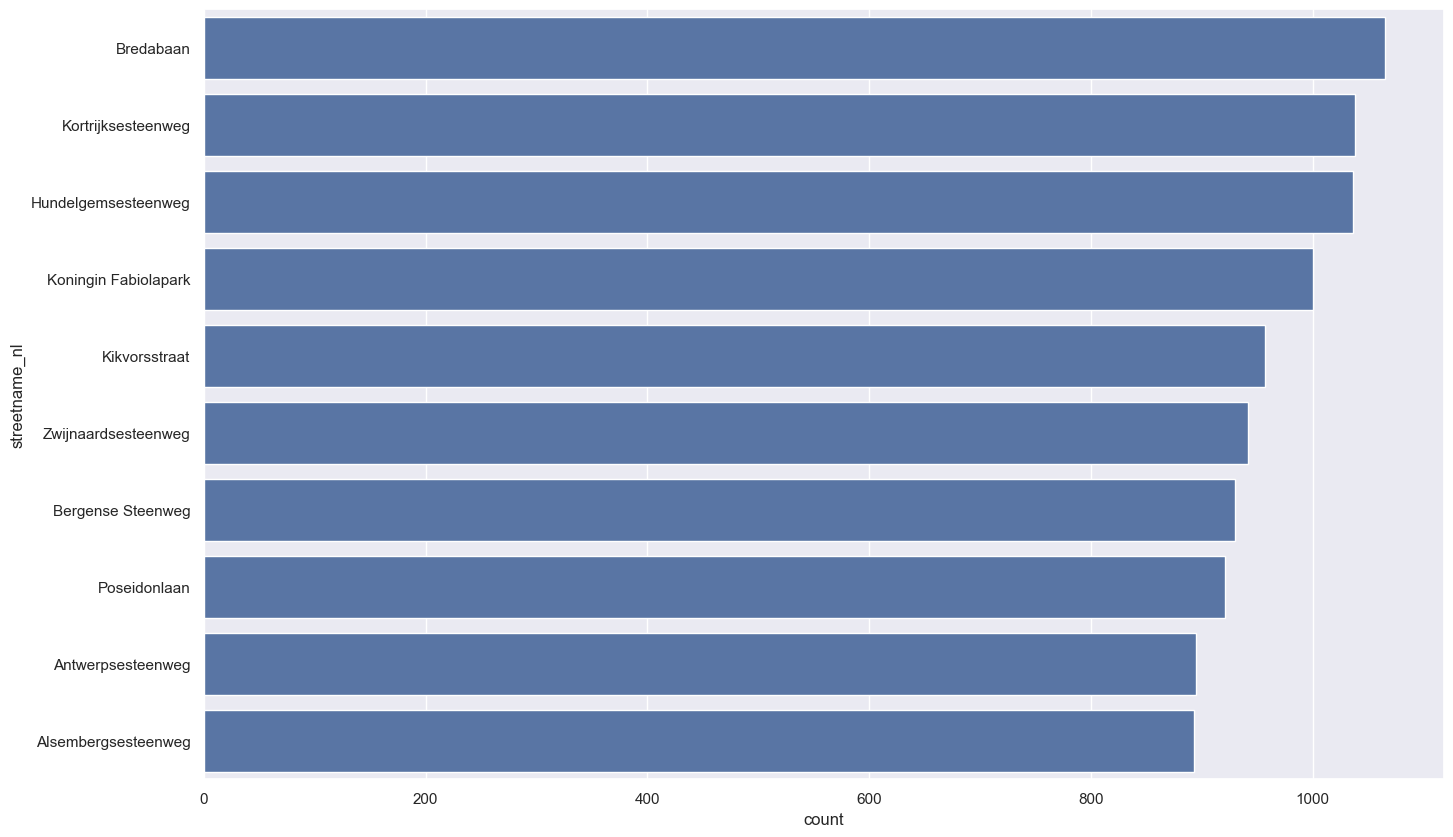

In [11]:
# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_nl', x='count', data=result.reset_index(), orient='h')

### French streets

In [11]:
# Select the housenumbers of each street
streets = belgium[['streetname_fr', 'postcode', 'house_number']].drop_duplicates()
# Group and count
result = streets.groupby(['streetname_fr', 'postcode']).count().rename(columns={'house_number': 'count'}).sort_values(by='count', ascending=False).head(10)
result

,,count
streetname_fr,postcode,
Chaussée de Mons,1070,897
Chaussée d'Alsemberg,1180,884
Chaussée de Wavre,1160,759
Chaussée de Waterloo,1180,673
Rue de Visé,4020,657
Avenue du Champ de Bataille,7012,625
Chaussée de Haecht,1030,553
Avenue Eugène Mascaux,6001,546
Chaussée de Bruxelles,1410,518


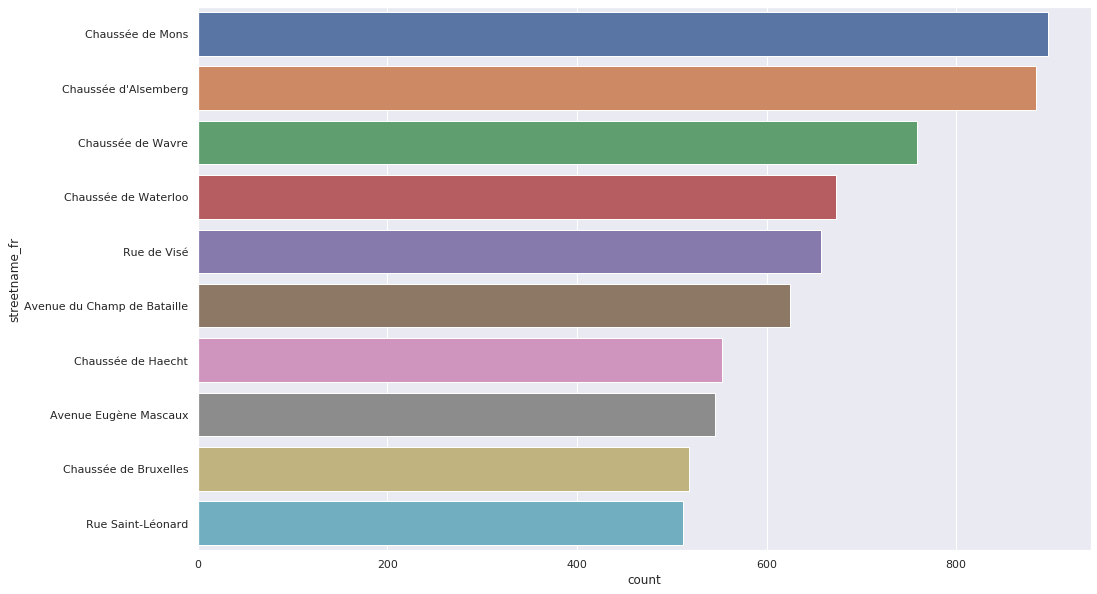

In [12]:
# Plot the results
plt.figure(figsize=(16, 10))
sns.barplot(y='streetname_fr', x='count', data=result.reset_index(), orient='h')